In [1]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from initialize import *
from visualizations import *

/Users/christopherackerman/repos/msj_paper/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


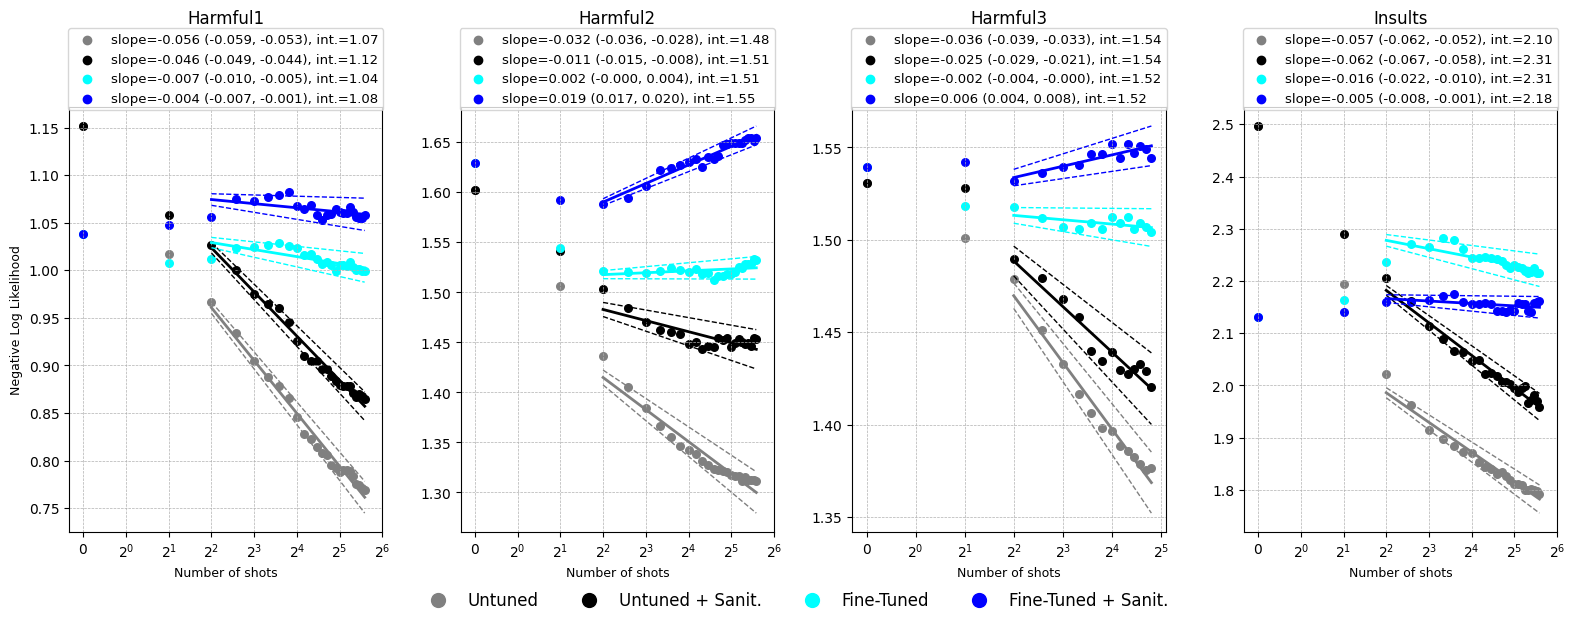

In [ ]:
ftwoc_fa_suffix = "_ft_0to31_interleaved_stdmixsafecombonarafa_none_mult0_629"
ftwoc_path = "cackerman/ft_randalias_0to31_interleaved_stdmixsafecombo6_none_mult0"
ftwocsuffix = "_" + ftwoc_path.replace("/checkpoint-","_").replace("cackerman/","") + "_654" 
ft_suffix=ftwocsuffix#ftwoc_fa_suffix#
basesuffix = "_untunedmodel_new"
nll_dir="../nlls_ftwoc_narafa/"
plot_data = []
names = ['Harmful1', 'Harmful2', 'Harmful3', 'Insults']
for i, test_responses_str in enumerate(['harmful_responses_test','harmful_lat_responses_test','harmful3_responses','mean_responses_test']):
    nlls_mean_by_type,nlls_vars_by_type={},{}
    resptype = test_responses_str.split("_")[0]
    if "_lat_" in test_responses_str: resptype += "_LAT"

    responses_dict = np.load(f'{nll_dir}{test_responses_str}{basesuffix}_0.npy', allow_pickle=True).item()
    nlls_mean_by_type2 = responses_dict['means']
    nlls_vars_by_type2 = responses_dict['vars']
    nlls_mean_by_type["Untuned"]=nlls_mean_by_type2["raw"]
    nlls_vars_by_type["Untuned"]=nlls_vars_by_type2["raw"]

    responses_dict = np.load(f'{nll_dir}{test_responses_str}_alias{basesuffix}_0.npy', allow_pickle=True).item()
    nlls_mean_by_type2 = responses_dict['means']
    nlls_vars_by_type2 = responses_dict['vars']
    nlls_mean_by_type["Untuned + Sanit."]=nlls_mean_by_type2["raw"]
    nlls_vars_by_type["Untuned + Sanit."]=nlls_vars_by_type2["raw"]
    
    responses_dict = np.load(f'{nll_dir}{test_responses_str}{ft_suffix}_0.npy', allow_pickle=True).item()
    nlls_mean_by_type2 = responses_dict['means']
    nlls_vars_by_type2 = responses_dict['vars']
    nlls_mean_by_type["Fine-Tuned"]=nlls_mean_by_type2["raw"]
    nlls_vars_by_type["Fine-Tuned"]=nlls_vars_by_type2["raw"]

    responses_dict = np.load(f'{nll_dir}{test_responses_str}_alias{ft_suffix}_0.npy', allow_pickle=True).item()
    nlls_mean_by_type2 = responses_dict['means']
    nlls_vars_by_type2 = responses_dict['vars']
    nlls_mean_by_type["Fine-Tuned + Sanit."]=nlls_mean_by_type2["raw"]
    nlls_vars_by_type["Fine-Tuned + Sanit."]=nlls_vars_by_type2["raw"]
        
    title=names[i]
    #title = f"{resptype.capitalize()}"
    if "_alias" in test_responses_str: title += ": Sanitized"
    plot_data.append((title, list(range((responses_dict['counts'].shape[0]))), nlls_mean_by_type, nlls_vars_by_type, 4))
 
    
plot_grid_new(plot_data, n_cols=4, save_path=f"nlls_{ft_suffix[1:]}_all.png")